<a href="https://colab.research.google.com/github/Choiwonjeong/In-OsakaUniv/blob/master/Empty_Parking_Space_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 1. Parking Space Layout Detection

In [0]:
def extract_boxes2(filename):
  file = open(filename, 'r')
  boxes = list()
  while True:
    line = file.readline()
    if not line: 
      break
    lst = line.split()
    xmin = int(lst[0])
    ymax = int(lst[1])
    xmax = int(lst[2])
    ymin = int(lst[3])
    coors = [xmin, ymin, xmax, ymax]
    boxes.append(coors)

  file.close()
  return boxes

In [6]:
# example of inference with a pre-trained coco model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle

# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          x1, y1, x2, y2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

Using TensorFlow backend.


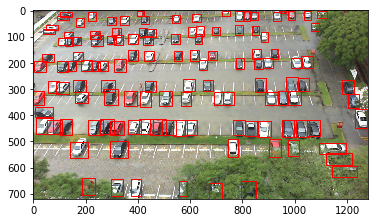

In [7]:
boxes = extract_boxes2('/content/drive/My Drive/OsakaUniv/datasets/PUCPR+_devkit/data/Annotations/0_Rainy.txt')
draw_image_with_boxes('/content/drive/My Drive/OsakaUniv/datasets/PUCPR+_devkit/data/Images/0_Rainy.jpg', boxes)

annotation(ground truth box)


---



In [0]:
import os
os.chdir('/content/drive/My Drive/OsakaUniv/Train an Object Detection Model with Keras/Mask_RCNN')

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle

# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

# define the test configuration
class TestConfig(Config):
     NAME = "pucpr_test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 1

In [0]:
os.chdir('/content/drive/My Drive/OsakaUniv/Empty Parking Space Detection')

W0715 13:39:32.074623 140048061249408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 13:39:32.130500 140048061249408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 13:39:32.149243 140048061249408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 13:39:32.211813 140048061249408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0715 13:39:32.220042 140048061

Re-starting from epoch 10


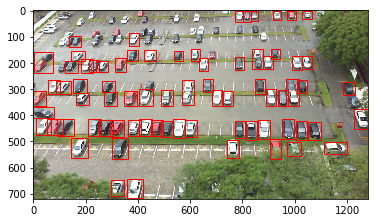

In [11]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('/content/drive/My Drive/OsakaUniv/datasets/CARPK_devkit/carpk_cfg20190709T1720/mask_rcnn_carpk_cfg_0010.h5', by_name=True)

# load photograph
img = load_img('/content/drive/My Drive/OsakaUniv/datasets/PUCPR+_devkit/data/Images/0_Rainy.jpg')
img = img_to_array(img)

# make prediction
results = rcnn.detect([img], verbose=0)
# visualize the results
draw_image_with_boxes('/content/drive/My Drive/OsakaUniv/datasets/PUCPR+_devkit/data/Images/0_Rainy.jpg', results[0]['rois'])

In [12]:
results[0]['rois']

array([[ 493,  741,  562,  786],
       [ 415,  952,  492,  998],
       [ 415,  533,  487,  582],
       [ 419,  449,  480,  496],
       [ 422,  815,  494,  855],
       [ 370,    0,  411,   78],
       [ 417,  251,  480,  306],
       [ 409,   10,  477,   69],
       [ 422,  771,  486,  809],
       [ 422,  490,  483,  536],
       [ 415,  405,  479,  455],
       [ 264, 1007,  315, 1048],
       [ 419,  580,  485,  626],
       [ 420,  861,  490,  904],
       [ 304,  935,  366,  975],
       [ 173, 1027,  225, 1064],
       [ 644,  357,  718,  421],
       [ 417,  362,  478,  413],
       [ 414,  209,  481,  261],
       [ 425, 1049,  494, 1099],
       [ 263,  966,  364, 1017],
       [ 421, 1003,  494, 1046],
       [ 300,  890,  363,  929],
       [ 420,  293,  482,  348],
       [ 307,    1,  364,   50],
       [ 309,  724,  365,  765],
       [ 487,  146,  562,  210],
       [ 646,  296,  708,  346],
       [ 488,  302,  567,  361],
       [ 263,  154,  316,  205],
       [ 3

In [13]:
predict_bounding_boxes = results[0]['rois']
len(predict_bounding_boxes )

74

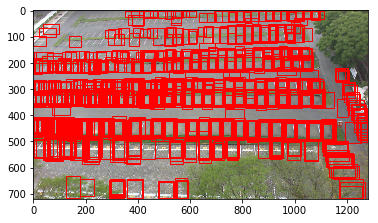

In [14]:
from os import listdir
from numpy import zeros
from numpy import asarray

# draw image with multiple boxes
baseimg = pyplot.imread('/content/drive/My Drive/OsakaUniv/datasets/PUCPR+_devkit/data/Images/1_Cloudy.jpg')
pyplot.imshow(baseimg)

img_dir = '/content/drive/My Drive/OsakaUniv/datasets/PUCPR+_devkit/data/Images/'
count = -1
center_x = list()
center_y = list()
w_list = list()
h_list = list()

for filename in listdir(img_dir):
  count += 1
  if count == 30:
    break
  img_path = img_dir+filename
  ax = pyplot.gca()
  img = load_img(img_path)
  img = img_to_array(img)
  
  results = rcnn.detect([img], verbose=0)
  for box in results[0]['rois']:
      # get coordinates
      y1, x1, y2, x2 = box
      # calculate width and height of the box
      width, height = x2 - x1, y2 - y1
      # create the shape
      rect = Rectangle((x1, y1), width, height, fill=False, color='red')
      # draw the box
      ax.add_patch(rect)
      # calculate width and height of the box
      width, height = x2 - x1, y2 - y1
      center_x.append((x1+x2)/2)
      center_y.append((y1+y2)/2)
      w_list.append(width)
      h_list.append(height)

pyplot.show()

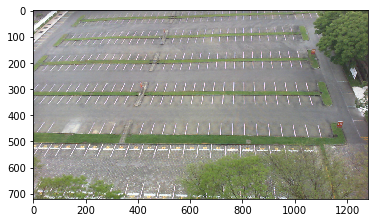

In [15]:
pyplot.imshow(baseimg)

In [16]:
len(listdir(img_dir))

125

# center point method

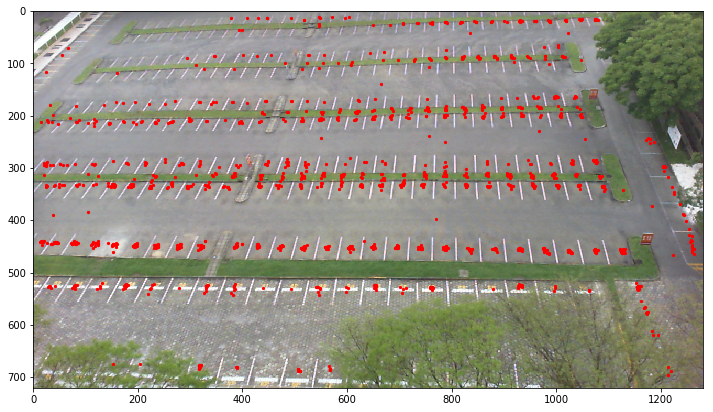

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.imshow(baseimg, zorder=1)
plt.scatter(center_x, center_y, s = 5, zorder=2, c = 'r')
plt.xlim([0, 1280])
plt.ylim([0,720])
plt.gca().invert_yaxis()

plt.show()

In [0]:
# representation of array
import numpy as np
a = np.array(center_x)

b = np.array(center_y)

c = np.vstack([a,b])

X = np.transpose(c)

아래는 

k-means clustering 사용

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 250)  # need to know the number of clusters
kemans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

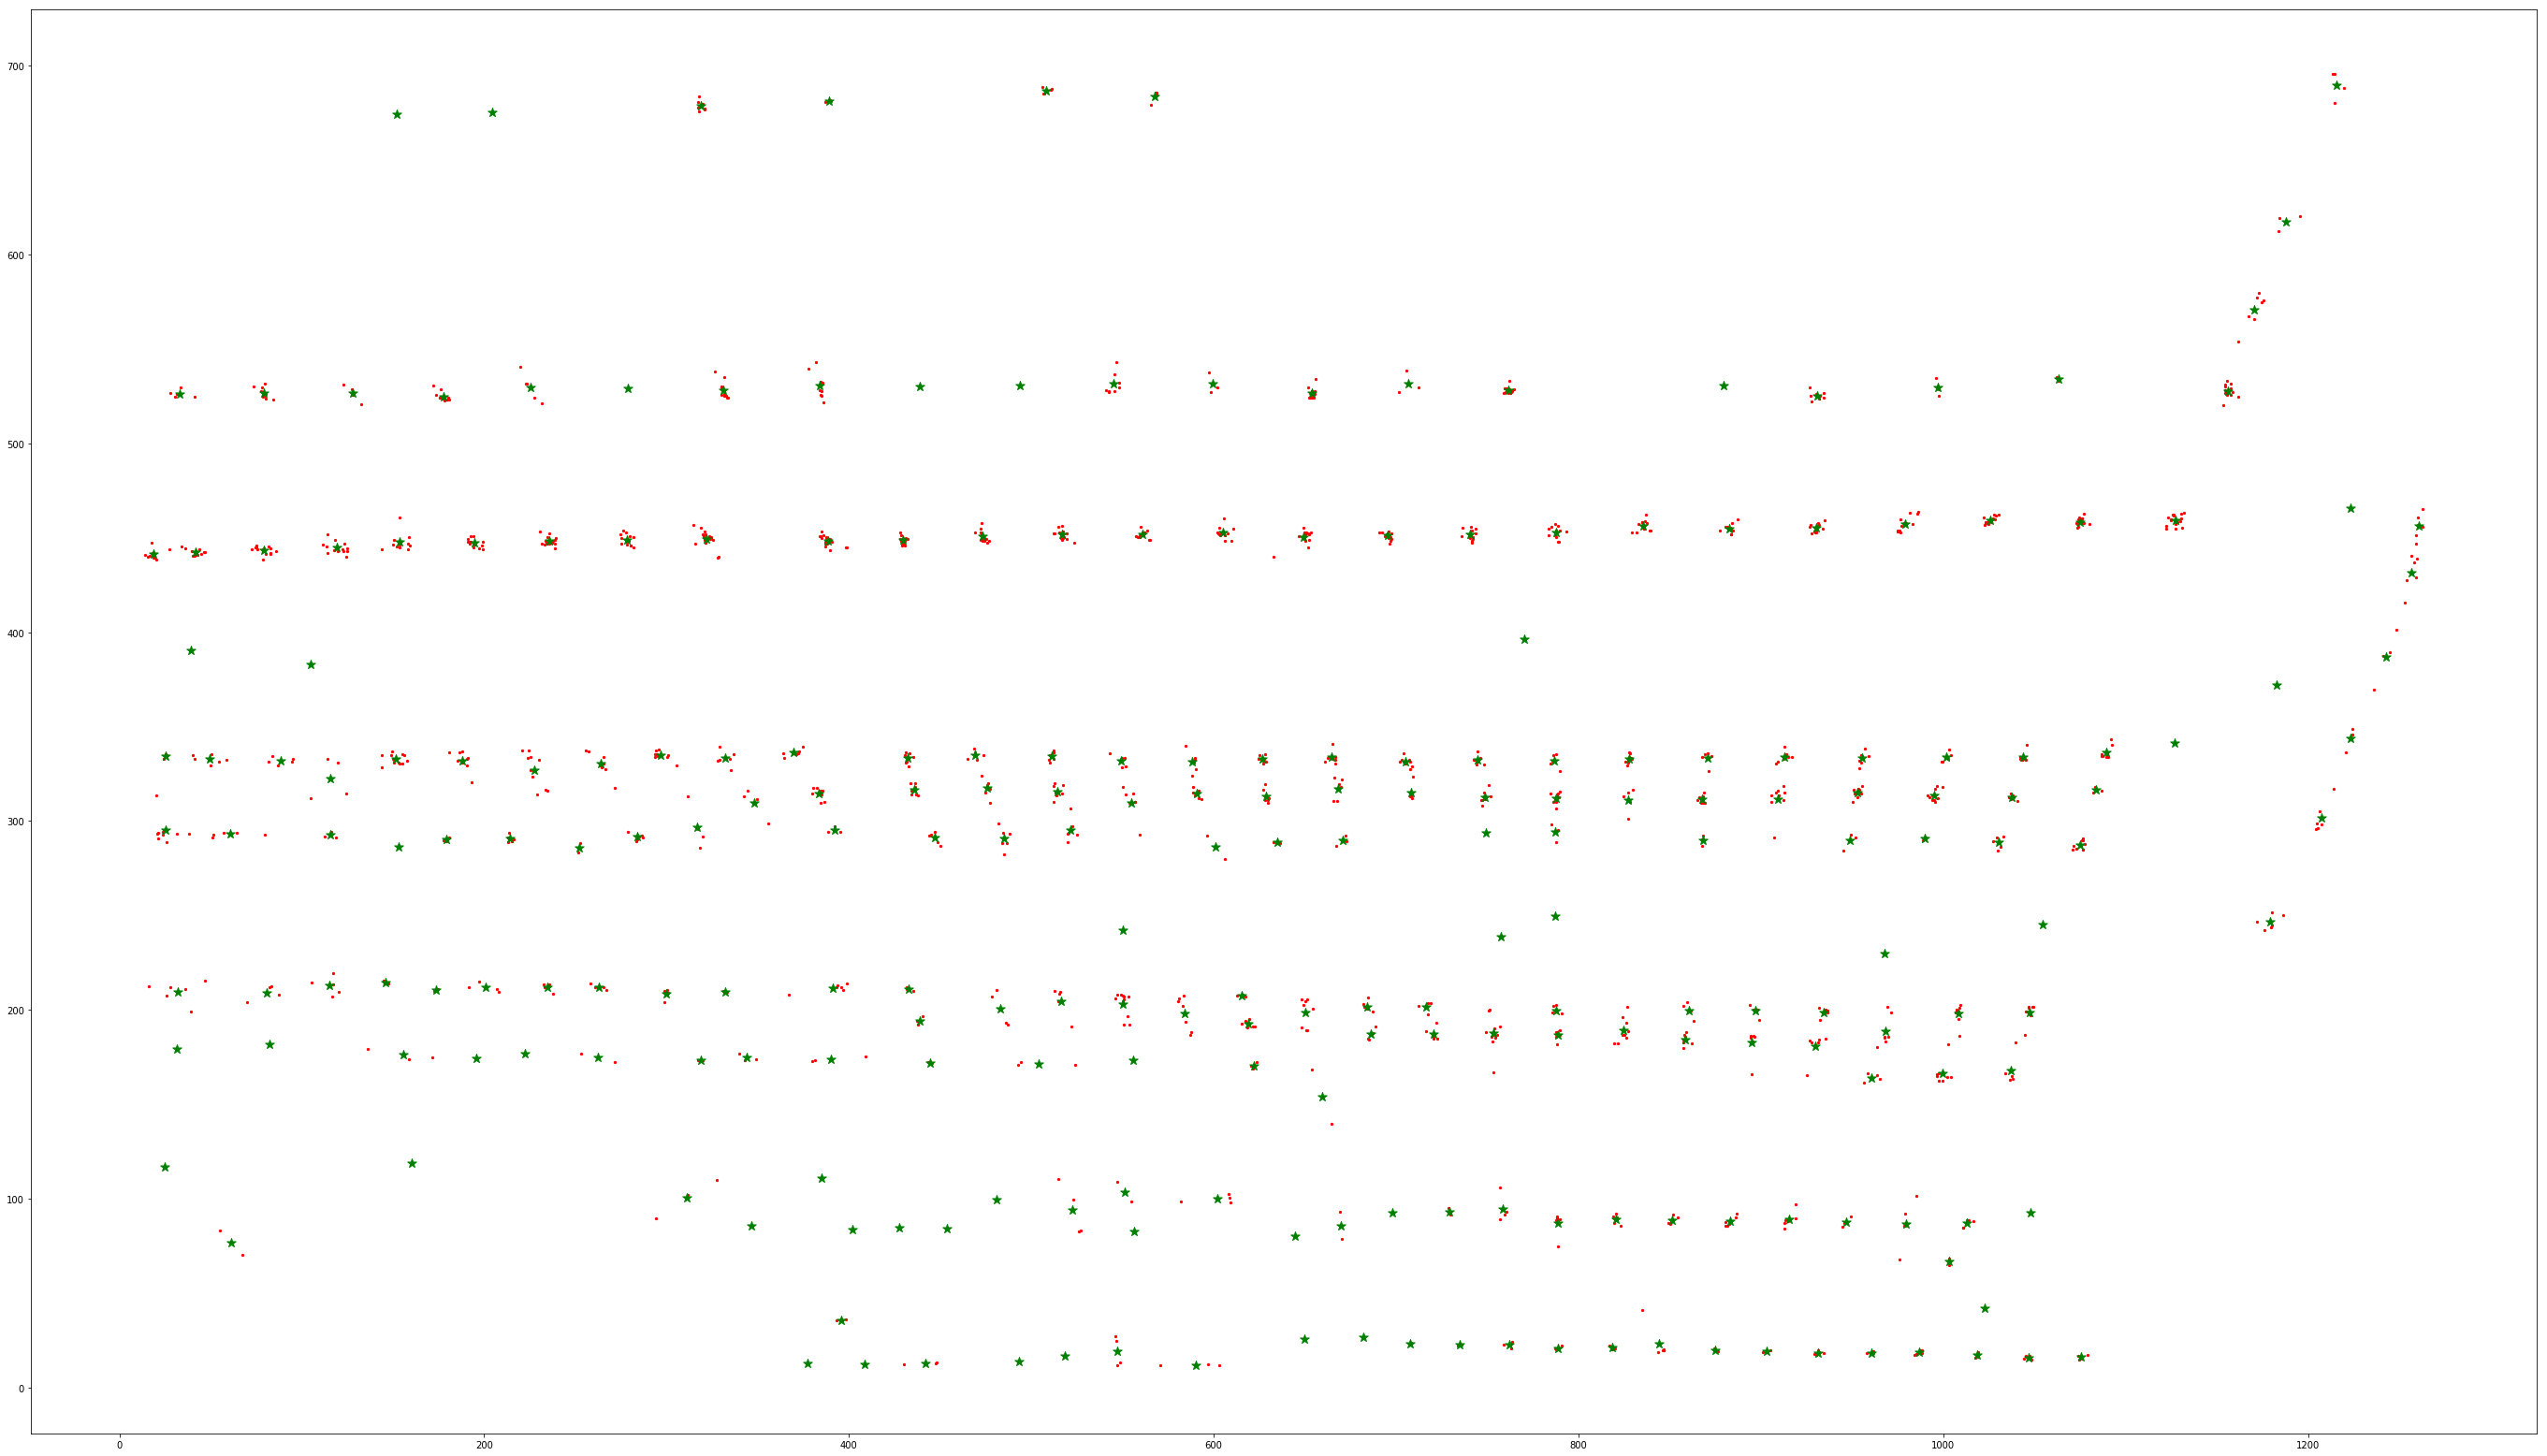

In [20]:
plt.figure(figsize=(48, 28))
plt.scatter(center_x, center_y, s = 5, c = 'r')
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='g')

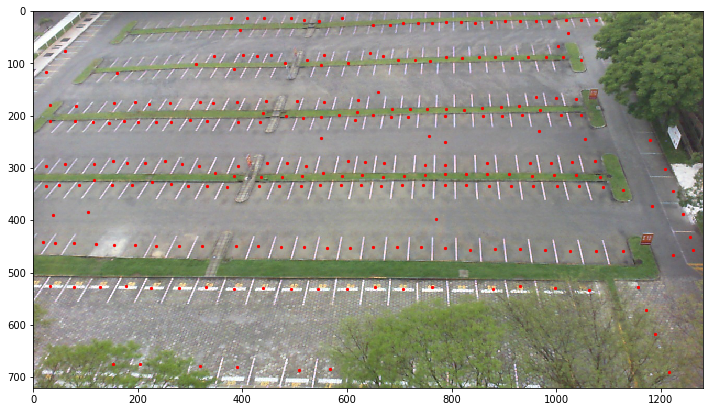

In [21]:
plt.figure(figsize=(12,7))
plt.imshow(baseimg, zorder=1)
plt.scatter(centroids[:,0], centroids[:,1], s = 5, zorder=2, c = 'r')
plt.xlim([0, 1280])
plt.ylim([0,720])
plt.gca().invert_yaxis()
plt.show()

In [22]:
w_avg = sum(w_list)/len(w_list)
h_avg = sum(h_list)/len(h_list)

w_avg, h_avg

(45.76749116607774, 63.27632508833922)

In [0]:
w_avg2 = 30
h_avg2 = 40

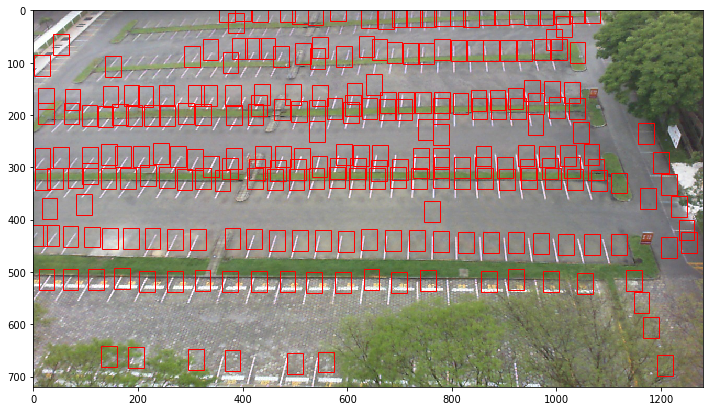

In [157]:
plt.figure(figsize=(12, 7))

pyplot.imshow(baseimg)
ax = pyplot.gca()

for cen in centroids:
  x1 = cen[0]-(w_avg/2)
  y1 = cen[1]-(h_avg/2)
  rect = Rectangle((x1, y1), w_avg2, h_avg2, fill=False, color='red')
  ax.add_patch(rect)
  
pyplot.show()

## DBSCAN Clustering

In [25]:
import pandas as pd

data = pd.DataFrame(X)
data.columns=['x_cor','y_cor']
data.head()


x_cor  y_cor
0  633.0  440.0
1  978.5  457.5
2   18.0  441.0
3  763.5  527.5
4  975.0  453.5

In [26]:
feature = data[['x_cor', 'y_cor']]
feature.head()

x_cor  y_cor
0  633.0  440.0
1  978.5  457.5
2   18.0  441.0
3  763.5  527.5
4  975.0  453.5

In [0]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

model = DBSCAN(eps=10, min_samples=2)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

In [111]:
df = pd.concat([feature,predict],axis=1)
df.head()

x_cor  y_cor  predict
0  633.0  440.0       -1
1  978.5  457.5        0
2   18.0  441.0        1
3  763.5  527.5        2
4  975.0  453.5        0

### represent all coordinates

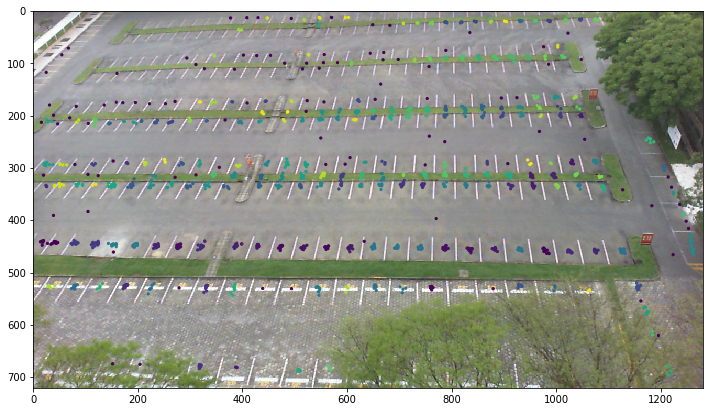

In [112]:
plt.figure(figsize=(12,7))
plt.imshow(baseimg, zorder=1)
plt.scatter(df.x_cor, df.y_cor, s = 5, zorder=2, c = df.predict)
plt.xlim([0, 1280])
plt.ylim([0,720])
plt.gca().invert_yaxis()
plt.show()

### represent coordinates except outliers

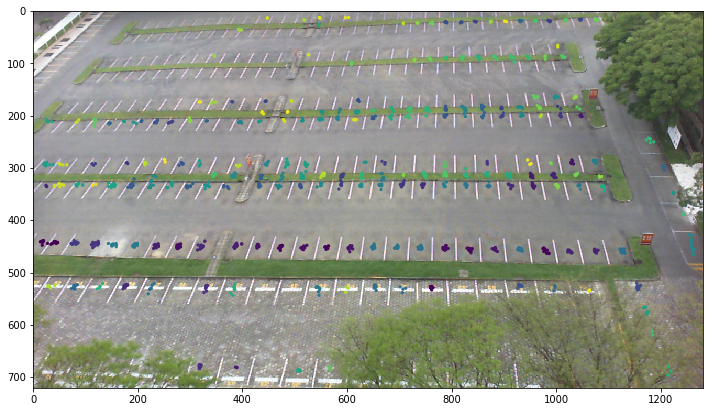

In [155]:
df2 = df.loc[df['predict'] != -1]

plt.figure(figsize=(12,7))
plt.imshow(baseimg, zorder=1)
plt.scatter(df2.x_cor, df2.y_cor, s = 5, zorder=2, c = df2.predict)
plt.xlim([0, 1280])
plt.ylim([0,720])
plt.gca().invert_yaxis()
plt.show()

In [139]:
num_of_clusters = max(df2['predict'])+1
print('number of clusters :', num_of_clusters)

centers = np.zeros((num_of_clusters, 3))
for i in range(0, num_of_clusters):
  cluster_points = df2.loc[df['predict'] == i]
  cluster_mean = np.mean(cluster_points, axis=0)
  centers[i][0] = cluster_mean.x_cor
  centers[i][1] = cluster_mean.y_cor
  centers[i][2] = int(cluster_mean.predict)

centers = pd.DataFrame(centers)
centers.columns = ['xmean', 'ymean', 'predict']

number of clusters : 192


In [152]:
centers.head()

xmean       ymean  predict
0  978.966667  457.166667      0.0
1   30.113636  441.840909      1.0
2  761.678571  528.142857      2.0
3  561.181818  451.818182      3.0
4  473.433333  450.600000      4.0

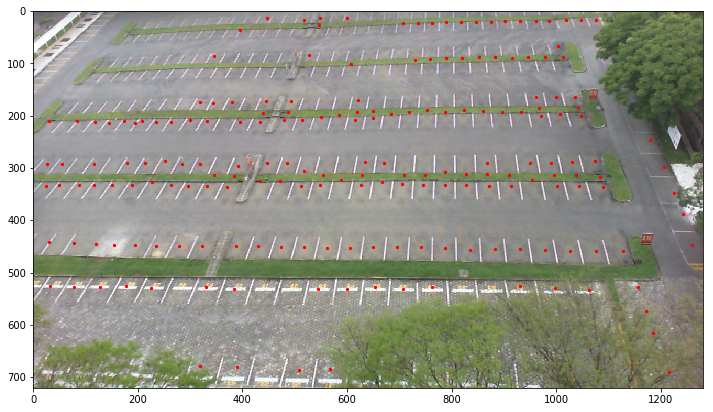

In [117]:
plt.figure(figsize=(12,7))
plt.imshow(baseimg, zorder=1)
plt.scatter(centers['xmean'], centers['ymean'], s = 5, zorder=2, c = 'r')
plt.xlim([0, 1280])
plt.ylim([0,720])
plt.gca().invert_yaxis()
plt.show()

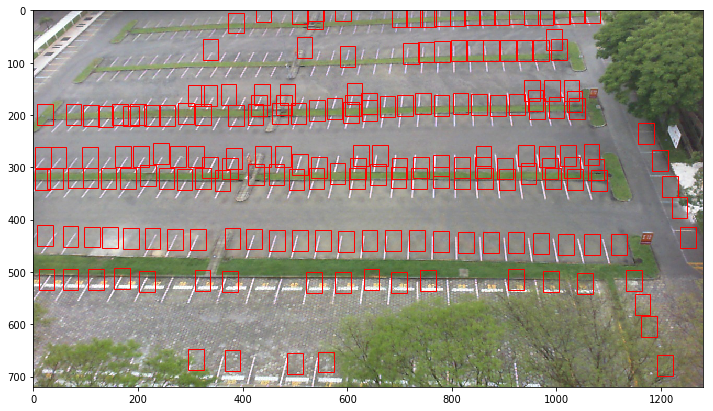

In [153]:
plt.figure(figsize=(12,7))

pyplot.imshow(baseimg)
ax = pyplot.gca()

for cen in np.array(centers):
  x1 = cen[0]-(w_avg/2)
  y1 = cen[1]-(h_avg/2)
  rect = Rectangle((x1, y1), w_avg2, h_avg2, fill=False, color='red')
  ax.add_patch(rect)
  
pyplot.show()

### cluster new point in DBSCAN

In [0]:
# samples
new_x = [400, 402, 397]
new_y = [442, 448, 445]

new_x = np.array(new_x)
new_y = np.array(new_y)
new = np.vstack([new_x, new_y])
new = np.transpose(new)

In [0]:
def dbscan_predict(model, X):

    nr_samples = X.shape[0]

    y_new = np.ones(shape=nr_samples, dtype=int) * -1

    for i in range(nr_samples):
        diff = model.components_ - X[i, :]  # NumPy broadcasting

        dist = np.linalg.norm(diff, axis=1)  # Euclidean distance

        shortest_dist_idx = np.argmin(dist)

        if dist[shortest_dist_idx] < model.eps:
            y_new[i] = model.labels_[model.core_sample_indices_[shortest_dist_idx]]

    return y_new

In [120]:
dbscan_predict(model, new)

array([16, 16, 16])

In [121]:
df2.loc[df2['predict'] == 16]

x_cor  y_cor  predict
20    387.5  447.5       16
103   388.0  448.5       16
173   387.0  447.0       16
212   387.0  445.5       16
305   387.5  450.0       16
383   398.5  445.0       16
426   387.0  448.0       16
498   388.0  447.5       16
560   389.5  443.5       16
648   384.0  451.0       16
702   388.0  447.0       16
721   389.5  449.5       16
800   384.5  451.0       16
893   390.5  448.0       16
935   399.0  445.0       16
991   386.0  451.5       16
1075  388.5  447.5       16
1261  385.0  450.0       16
1312  385.0  453.5       16
1347  387.5  450.5       16

### Empty Space Detection

Re-starting from epoch 10


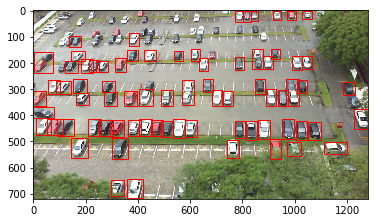

In [123]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('/content/drive/My Drive/OsakaUniv/datasets/CARPK_devkit/carpk_cfg20190709T1720/mask_rcnn_carpk_cfg_0010.h5', by_name=True)

# load photograph
img = load_img('/content/drive/My Drive/OsakaUniv/datasets/PUCPR+_devkit/data/Images/0_Rainy.jpg')
img = img_to_array(img)

# make prediction
results = rcnn.detect([img], verbose=0)
# visualize the results
draw_image_with_boxes('/content/drive/My Drive/OsakaUniv/datasets/PUCPR+_devkit/data/Images/0_Rainy.jpg', results[0]['rois'])

In [126]:
predict_bounding_boxes = results[0]['rois']
len(predict_bounding_boxes)

74

In [0]:
predict_cen_x = list()
predict_cen_y = list()

for box in predict_bounding_boxes:
  # get coordinates
  y1, x1, y2, x2 = box
  # calculate width and height of the box
  width, height = x2 - x1, y2 - y1
  
  predict_cen_x.append((x1+x2)/2)
  predict_cen_y.append((y1+y2)/2)

In [132]:
predict_cen_x = np.array(predict_cen_x)
predict_cen_y = np.array(predict_cen_y)
predict_cen = np.vstack([predict_cen_x, predict_cen_y])

predict_cen = np.transpose(predict_cen)
predict_cen.shape

(74, 2)

In [133]:
occupied_labels = dbscan_predict(model, predict_cen)
occupied_labels

array([ 2,  0,  3,  4,  5, -1,  6,  1,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, -1, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, -1, 39, 40, 41, 42, 43, 44, -1, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, -1, -1, 59, 60, 61,
       -1, -1, 62, 63, 64, -1])

In [160]:
centers[60:70]

xmean       ymean  predict
60   332.000000  209.750000     60.0
61   859.375000  190.875000     61.0
62   997.000000  529.333333     62.0
63  1205.800000  298.800000     63.0
64   931.214286   18.500000     64.0
65   706.625000  531.625000     65.0
66    79.150000  526.550000     66.0
67   225.250000  529.666667     67.0
68  1127.156250  458.968750     68.0
69   654.038462  526.500000     69.0

In [145]:
empty_space = centers[~centers['predict'].isin(occupied_labels)]
empty_space.head()
  

xmean       ymean  predict
65   706.625000  531.625000     65.0
66    79.150000  526.550000     66.0
67   225.250000  529.666667     67.0
68  1127.156250  458.968750     68.0
69   654.038462  526.500000     69.0

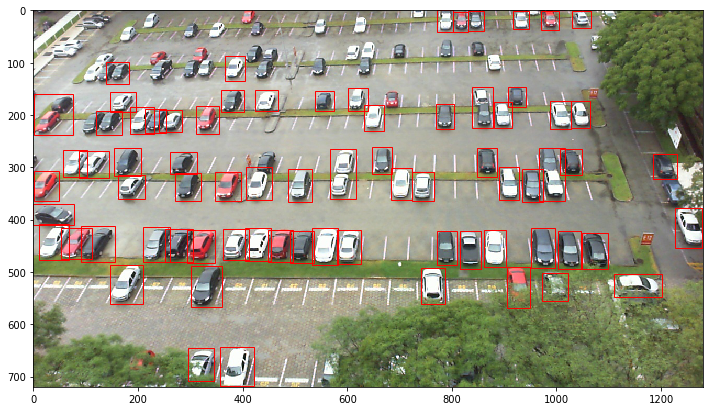

In [151]:
#origianl image
plt.figure(figsize=(12,7))
draw_image_with_boxes('/content/drive/My Drive/OsakaUniv/datasets/PUCPR+_devkit/data/Images/0_Rainy.jpg', results[0]['rois'])

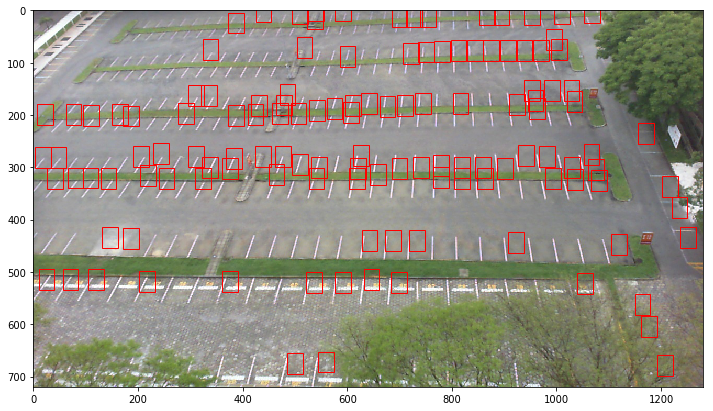

In [150]:
plt.figure(figsize=(12,7))

pyplot.imshow(baseimg)
ax = pyplot.gca()

for cen in np.array(empty_space):
  x1 = cen[0]-(w_avg/2)
  y1 = cen[1]-(h_avg/2)
  rect = Rectangle((x1, y1), w_avg2, h_avg2, fill=False, color='red')
  ax.add_patch(rect)
  
pyplot.show()